In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt

In [3]:
#unifying names 
data=pd.read_csv("train.csv")
data = data.rename(columns={"pickup_BoroCode":"pickup_boro_code","pickup_NTACode":"pickup_nta_code","dropoff_BoroCode":"dropoff_boro_code","dropoff_NTACode":"dropoff_nta_code", "pickup_doy":"pickup_day"})
data=data[data["length_time"]<=4236]
data=data.loc[data["length_time"]>=60] 
data=data.loc[data["trip_distance"]>=0.01]

In [8]:
data

,weight,response,pickup_hour,pickup_month,pickup_week,pickup_day,pickup_wday,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,1.75,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,1,2.95,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
2,1,2.46,7,5,19,132,4,1016,1,MN25,1,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,MN25-MN27
3,1,1.66,11,5,20,134,6,550,1,MN99,1,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,MN99-MN20
4,1,1.75,20,5,19,128,7,501,1,MN20,1,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,MN20-MN22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343741,1,2.00,20,5,21,145,3,740,1,MN12,1,MN36,-73.978676,40.783512,-73.938370,40.850533,2,1,5.84,18.5,MN12-MN36
343742,1,1.00,23,5,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,MN14-MN12
343743,1,2.35,19,5,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,MN20-MN22
343744,1,2.65,21,5,20,140,5,955,1,MN13,1,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,MN13-MN27


In [4]:
y=data["response"]
X=data.drop(["response","pair"], axis=1)
X['vendor_id']=X["vendor_id"].map(str)
X['pickup_boro_code']=X["pickup_boro_code"].map(str)
X['dropoff_boro_code']=X["dropoff_boro_code"].map(str)
X=pd.get_dummies(X)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

def evaluate_estimator(estimator, X, y): 
    # Make predictions
    y_pred = estimator.predict(X)
    
    
    mae = mean_absolute_error(y, y_pred)
    
    # Create a dictionary to hold the performance metrics
    metrics = {
        'MAE': mae
    }
    
    return metrics


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_residuals(model, X, y):
    """
    Plot residuals of a model.
    
    Parameters:
        model: Fitted regression model (e.g., from scikit-learn)
        X: Independent variables (features)
        y: Observed values
        
    Returns:
        None
    """
    # Make predictions using the model
    y_pred = model.predict(X)

    # Compute residuals
    residuals = y - y_pred

    # Plot residuals against predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn
# Load the Iris dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_regressor = sklearn.ensemble.HistGradientBoostingRegressor(loss="absolute_error" ,random_state=42,verbose=3,max_iter=1000)

# Train the Random Forest classifier on the training data
rf_regressor.fit(X_train, y_train)

Binning 0.693 GB of training data: 3.100 s
Binning 0.077 GB of validation data: 0.043 s
Fitting gradient boosted rounds:
[1/1000] 1 tree, 31 leaves, max depth = 7, train loss: 1.27378, val loss: 1.28731, in 0.213s
[2/1000] 1 tree, 31 leaves, max depth = 8, train loss: 1.18760, val loss: 1.19968, in 0.173s
[3/1000] 1 tree, 31 leaves, max depth = 9, train loss: 1.11322, val loss: 1.12384, in 0.188s
[4/1000] 1 tree, 31 leaves, max depth = 10, train loss: 1.04657, val loss: 1.05584, in 0.176s
[5/1000] 1 tree, 31 leaves, max depth = 8, train loss: 0.98650, val loss: 0.99480, in 0.165s
[6/1000] 1 tree, 31 leaves, max depth = 9, train loss: 0.93521, val loss: 0.94290, in 0.169s
[7/1000] 1 tree, 31 leaves, max depth = 10, train loss: 0.89183, val loss: 0.89907, in 0.178s
[8/1000] 1 tree, 31 leaves, max depth = 8, train loss: 0.85621, val loss: 0.86343, in 0.183s
[9/1000] 1 tree, 31 leaves, max depth = 9, train loss: 0.82232, val loss: 0.82932, in 0.175s
[10/1000] 1 tree, 31 leaves, max depth =

HistGradientBoostingRegressor(loss='absolute_error', max_iter=1000,
                              random_state=42, verbose=3)

{'MAE': 0.5380207966220709}


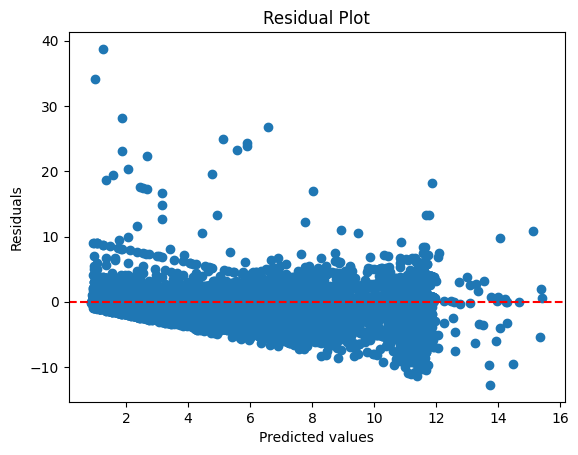

In [8]:
pred=rf_regressor.predict(X_test)
print(evaluate_estimator(rf_regressor,X_test,y_test))
plot_residuals(rf_regressor,X_test,y_test)

In [9]:
test=pd.read_csv("test.csv")

In [10]:
test=test.drop(["pair"], axis=1)

In [11]:
test["vendor_id"]=test["vendor_id"].map(str)
test=pd.get_dummies(test)

In [12]:
test = test.reindex(X.columns, axis=1, fill_value=0)

In [13]:
result=pd.Series(rf_regressor.predict(test))

In [15]:
result.to_csv("result.txt",sep="\t", index=False,header=False)

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores=learning_curve(estimator=rf_regressor,X=x_train,y=y_train)
plt.plot(train_sizes,train_scores),plt.plot(train_sizes,valid_scores)
